# Fig.3 Goodnesss-of-fit and computation time

In [1]:
%load_ext autoreload
%autoreload 2
import numpy
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import sys
import os

# Calculating computatin time
import time

from jax import config
import jax
config.update("jax_enable_x64", True)
# Comment if GPU is available
try:
    jax.devices()
except:
    config.update('jax_platforms','cpu')
    print('gpu is not recognized')
from jax import numpy as jnp

# To use the gaussian-toolbox, 
# go into the gaussian-toolbox folder, and type pip install .
# The maintained version of timeseries analysis using gaussian-toolbox is available at
# https://github.com/christiando/timeseries_models
import gaussian_toolbox
from timeseries_models import state_model, observation_model, state_space_model

2024-10-07 08:20:11.240998: W external/xla/xla/service/gpu/nvptx_compiler.cc:760] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.5.40). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [2]:
# To creat the data, make runall TRUE.
runall = False

if runall:
    !python Fig3_computation_time_nlss.py
    !python Fig3_computation_time_rbf.py

In [4]:
#import numpy
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

from scipy.integrate import solve_ivp
from scipy.stats import zscore

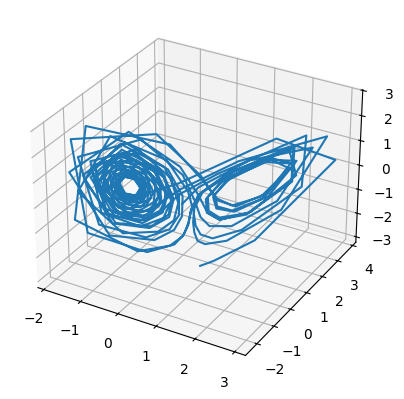

In [5]:
# Settings
# Noise
numpy.random.seed(0)
noise_level = .01

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def lorenz(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = numpy.linspace(0, 30, 300) #short trial

states = odeint(lorenz, state0, t)

X = states

X = zscore(X, axis=0)
X0 = X.copy()
X += noise_level * numpy.random.randn(*X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:, 0], X[:, 1], X[:, 2])
plt.draw()
plt.show()

## Figures

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


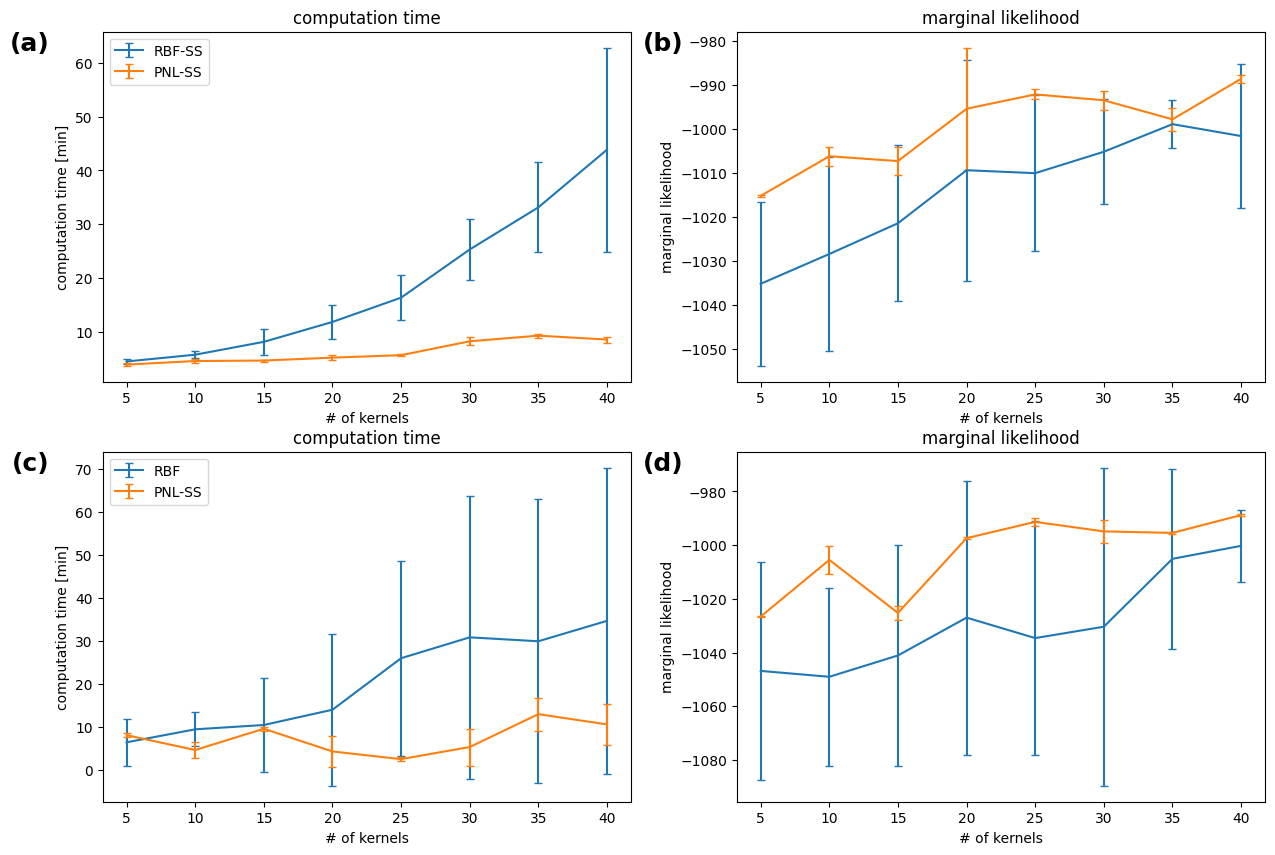

In [6]:
import pickle

f = open('../data/lorentz_computation_time_nlss_fix.dat','rb')
param_list_nlss, computation_time_nlss, dimension_nlss, likelihood_nlss = pickle.load(f)
f.close

f = open('../data/lorentz_computation_time_rbf_fix.dat','rb')
param_list_rbf, computation_time_rbf, dimension_rbf, likelihood_rbf = pickle.load(f)
f.close

#plt.figure(figsize=(15,10))
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)']
pos_l = [-0.1, 1.0]
ax[0,0].text(pos_l[0], pos_l[1], letters[0], 
             transform=ax[0, 0].transAxes, fontsize=18, weight='bold', va='top', ha='right')
ax[0,1].text(pos_l[0], pos_l[1], letters[1], 
             transform=ax[0, 1].transAxes, fontsize=18, weight='bold', va='top', ha='right')
ax[1,0].text(pos_l[0], pos_l[1], letters[2], 
             transform=ax[1, 0].transAxes, fontsize=18, weight='bold', va='top', ha='right')
ax[1,1].text(pos_l[0], pos_l[1], letters[3], 
             transform=ax[1, 1].transAxes, fontsize=18, weight='bold', va='top', ha='right')

plt.subplot(2,2,1)
plt.errorbar(param_list_rbf[0], numpy.mean(computation_time_rbf/60,0), yerr=2*numpy.std(computation_time_rbf/60,0), capsize=3)
plt.errorbar(param_list_nlss[0], numpy.mean(computation_time_nlss/60,0), yerr=2*numpy.std(computation_time_nlss/60,0), capsize=3)

plt.legend(['RBF-SS','PNL-SS'], loc='upper left')

plt.xlabel('# of kernels')
plt.ylabel('computation time [min]')
plt.title('computation time')

plt.subplot(2,2,2)
plt.errorbar(param_list_rbf[0], numpy.mean(likelihood_rbf,0), yerr=2*numpy.std(likelihood_rbf,0), capsize=3)
plt.errorbar(param_list_nlss[0], numpy.mean(likelihood_nlss,0), yerr=2*numpy.std(likelihood_nlss,0), capsize=3)


plt.xlabel('# of kernels')
plt.ylabel('marginal likelihood')
plt.title('marginal likelihood')



f = open('../data/lorentz_computation_time_nlss_cri.dat','rb')
param_list_nlss, computation_time_nlss, dimension_nlss, likelihood_nlss = pickle.load(f)
f.close

f = open('../data/lorentz_computation_time_rbf_cri.dat','rb')
param_list_rbf, computation_time_rbf, dimension_rbf, likelihood_rbf = pickle.load(f)
f.close

plt.subplot(2,2,3)
plt.errorbar(param_list_rbf[0], numpy.mean(computation_time_rbf/60,0), yerr=2*numpy.std(computation_time_rbf/60,0), capsize=3)
plt.errorbar(param_list_nlss[0], numpy.mean(computation_time_nlss/60,0), yerr=2*numpy.std(computation_time_nlss/60,0), capsize=3)

plt.legend(['RBF','PNL-SS'], loc='upper left')

plt.xlabel('# of kernels')
plt.ylabel('computation time [min]')
plt.title('computation time')


plt.subplot(2,2,4)
plt.errorbar(param_list_rbf[0], numpy.nanmean(likelihood_rbf,0), yerr=2*numpy.nanstd(likelihood_rbf,0), capsize=3)
plt.errorbar(param_list_nlss[0], numpy.mean(likelihood_nlss,0), yerr=2*numpy.std(likelihood_nlss,0), capsize=3)


plt.xlabel('# of kernels')
plt.ylabel('marginal likelihood')
plt.title('marginal likelihood')


plt.savefig('../fig/lorentz_nlss_rbf.eps', format='eps')
plt.savefig('../fig/lorentz_nlss_rbf.pdf', format='pdf')
plt.show()